### Classificação em Aprendizado de Máquina

A classificação é um tipo de aprendizado supervisionado onde o objetivo é prever a categoria de entrada de um conjunto de classes. Ao contrário da regressão, que prevê um valor contínuo, a classificação prediz uma categoria discreta.

#### Tipos de Classificação

1. **Classificação Ainária**: Classificação com duas classes. Por exemplo, determinar se um email é spam ou não spam.
2. **Classificação Multiclasse**: Classificação com mais de duas classes. Por exemplo, classificar uma fruta como maçã, banana ou cereja.
3. **Classificação Multilabel**: Cada exemplo pode pertencer a mais de uma classe. Por exemplo, um filme pode ser classificado em múltiplos gêneros.

#### Métricas para Avaliar Modelos de Classificação

Avaliar a performance de um modelo de classificação é crucial para entender como o modelo irá se comportar em dados não vistos. Algumas métricas comuns incluem:

1. **Acurácia**: A proporção de predições corretas feitas pelo modelo.
`Acurácia = (Verdadeiros Positivos + Verdadeiros Negativos) / (Total de Amostras)`
   - **Valores bons**: Mais próximo de 1.
   - **Valores ruins**: Mais próximo de 0.

2. **Precisão**: A proporção de predições positivas corretas.
`Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)`
   - **Valores bons**: Maior precisão significa menos falsos positivos.
   - **Valores ruins**: Mais próximo de 0.

3. **Recall**: A proporção de observações positivas reais que foram previstas corretamente.
`Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)`
   - **Valores bons**: Maior recall significa menos falsos negativos.
   - **Valores ruins**: Mais próximo de 0.

4. **F1-Score**: A média harmônica de Precisão e Recall, útil quando você deseja balancear Precisão e Recall.
`F1-Score = 2 * (Precisão * Recall) / (Precisão + Recall)`
   - **Valores bons**: Mais próximo de 1, indicando bom balanceamento entre Precisão e Recall.
   - **Valores ruins**: Mais próximo de 0.

5. **Curva ROC e Área Abaixo da Curva (AUC-ROC)**: A curva ROC mostra a capacidade do modelo de distinguir entre as classes. A AUC fornece uma agregação da performance em todos os limiares de classificação possíveis.
   - **Valores bons**: Mais próximo de 1, indicando excelente discriminação entre as classes.
   - **Valores ruins**: Mais próximo de 0.5, indicando nenhuma discriminação.

6. **Matriz de Confusão**: Uma tabela que mostra as frequências de classificação para cada classe. Não tem valores "bons" ou "ruins" em si, mas é útil para entender o tipo de erros que o modelo está cometendo.

A seleção de métricas depende do problema específico, das necessidades do negócio e das características do conjunto de dados. Compreender essas métricas e seus valores ideais pode ajudar na otimização e seleção do modelo mais apropriado.

#### Algoritmos Comuns de Classificação

Existem diversos algoritmos usados para classificação, como:

- Regressão Logística
- Máquinas de Suporte Vetorial (SVM)
- Árvores de Decisão e Florestas Aleatórias
- Redes Neurais

A escolha do algoritmo depende das características dos dados, dos requisitos do problema e da interpretabilidade desejada.

$$ Acurácia = \frac{VP+VN}{Total} $$

$$ Precisão = \frac{VP}{VP+FP} $$

$$ Recall = \frac{VP}{VP+FN} $$

$$ F1-Score = \frac{2 ⋅ Precisão ⋅ Recall}{Precisão+Recall} $$

## Métricas

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metricas_classificacao(y_real, y_pred):
    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro')
    }
    
    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return metrics

``Média Macro``: Calcula a métrica independente para cada classe e, em seguida, toma a média (portanto, trata todas as classes igualmente). É útil quando você quer que cada classe tenha o mesmo peso na métrica global, independentemente de quantas amostras há em cada classe. É uma boa opção quando as classes estão desbalanceadas e você quer uma métrica que não seja influenciada por isso.

`Média Micro`: Calcula a métrica globalmente, considerando cada elemento da matriz de confusão. É útil quando você quer que a métrica reflita a distribuição de classes no conjunto de dados.

`Média Weighted`: Calcula a métrica para cada classe e toma a média, ponderando as métricas pelo número de verdadeiros exemplos em cada classe. É útil quando você quer que a métrica reflita a distribuição de classes, mas ainda leve em conta o desempenho em cada classe individual.

`Sem Média`: Você também pode optar por não usar nenhuma média e, em vez disso, calcular a métrica para cada classe individualmente.

## Classificação Binária

Acurácia: 0.7988826815642458
Precisão (macro): 0.7951112877583466
Recall (macro): 0.7866795366795367
F1-Score (macro): 0.789906103286385
Matriz de Confusão:


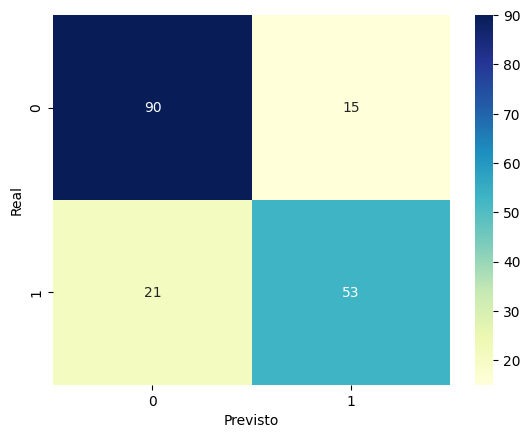

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('titanic.csv') # Caminho do arquivo

# Selecionar colunas relevantes e preencher valores ausentes (pode-se fazer um pré-processamento mais completo)
df = df[['classe_da_passagem', 'sexo', 'idade', 'irmaos_a_bordo', 'pais_ou_filhos_a_bordo', 'valor_bilhete', 'sobreviveu']]
df['sexo'] = df['sexo'].map({'male': 0, 'female': 1})
df['idade'].fillna(df['idade'].mean(), inplace=True)

# Dividir os dados em recursos (X) e alvo (y)
X = df.drop('sobreviveu', axis=1)
y = df['sobreviveu']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os recursos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e ajustar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo usando a função "joker"
metrics = metricas_classificacao(y_test, y_pred)

## Classificação Multiclasse

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

# Inicializar e ajustar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = model.predict(X_test)

Acurácia: 1.0
Precisão (macro): 1.0
Recall (macro): 1.0
F1-Score (macro): 1.0
Matriz de Confusão:


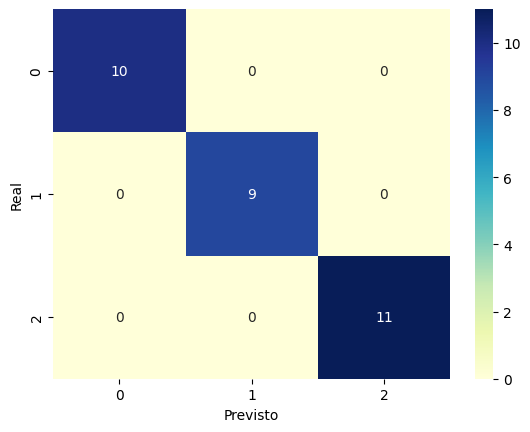

In [5]:
metricas = metricas_classificacao(y_test, y_pred)

# Biblioteca

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Regressão em Machine Learning

A regressão é uma técnica de aprendizado de máquina supervisionada utilizada para prever uma quantidade contínua. Ela encontra a relação entre as variáveis dependentes (saída) e independentes (características) em um conjunto de dados.

## Tópicos

### 1. Tipos de Regressão

#### a. Regressão Linear Simples
A regressão linear simples encontra a relação linear entre uma variável independente (X) e a variável dependente (Y). A relação é representada como uma linha reta.

#### b. Regressão Linear Múltipla
A regressão linear múltipla encontra a relação entre várias variáveis independentes (X1, X2, ..., Xn) e a variável dependente (Y).

#### c. Regressão Polinomial
A regressão polinomial modela a relação como uma equação polinomial. É útil quando os dados têm uma relação curvilínea.

`A regressão polinomial é uma forma de análise de regressão que modela a relação entre uma variável dependente 
y e uma ou mais variáveis independentes X usando uma equação polinomial. Ao contrário da regressão linear simples, que modela a relação como uma linha reta, a regressão polinomial pode capturar relações mais complexas que são curvilíneas ou não lineares.`
#### d. Regressão de Ridge e Lasso
Ridge e Lasso são técnicas de regularização que ajudam a evitar o overfitting no modelo.

### 2. Avaliação de Modelos de Regressão

Root Mean Square Error (RMSE):

O que é: A raiz quadrada da média dos erros quadráticos, medindo a diferença entre os valores que o modelo prevê e os valores reais.
O que nos diz: Oferece uma noção da magnitude dos erros do modelo, penalizando mais fortemente grandes erros.
Valor Ideal: Quanto mais próximo de 0, melhor.

#### Mean Square Error (MSE):
- O que é: A média dos erros quadráticos.
- O que nos diz: Semelhante ao RMSE, mostra o quão bem o modelo está ajustado, com maior penalização para grandes erros.
- Valor Ideal: O valor ideal é 0.

#### Mean Absolute Error (MAE):
- O que é: A média dos valores absolutos dos erros.
- O que nos diz: Fornece uma medida das previsões erradas sem penalizar grandes erros tanto quanto o MSE e o RMSE.
- Valor Ideal: 0, significando que as previsões estão perfeitamente corretas.

#### Median Absolute Error:
- O que é: A mediana dos valores absolutos dos erros.
- O que nos diz: Dá uma ideia de como o modelo está performando em um caso "típico" e é menos sensível a outliers.
- Valor Ideal: 0 é o valor ideal.

#### Explained Variance Score:
- O que é: Mostra a proporção da variação total na variável dependente que é capturada pelo modelo.
- O que nos diz: Um valor mais alto indica que o modelo explica uma grande parte da variabilidade nos dados.
- Valor Ideal: 100% é o valor ideal.

#### R2 Score:
- O que é: A porcentagem da variação da variável dependente que é previsível a partir das variáveis independentes.
- O que nos diz: Um valor mais alto significa que mais variações são explicadas pelo modelo, o que é desejável.
- Valor Ideal: 100% é o valor ideal.

#### Adjusted R2:
- O que é: Semelhante ao R2, mas ajustado com base no número de preditores no modelo.
- O que nos diz: Dá uma medida mais realista de quão bem o modelo se ajusta aos dados, especialmente quando se adiciona mais variáveis.
- Valor Ideal: 100% seria ideal, mas em geral, um valor que seja próximo ou igual ao R2 é considerado bom.


## Regressão Linear Simples

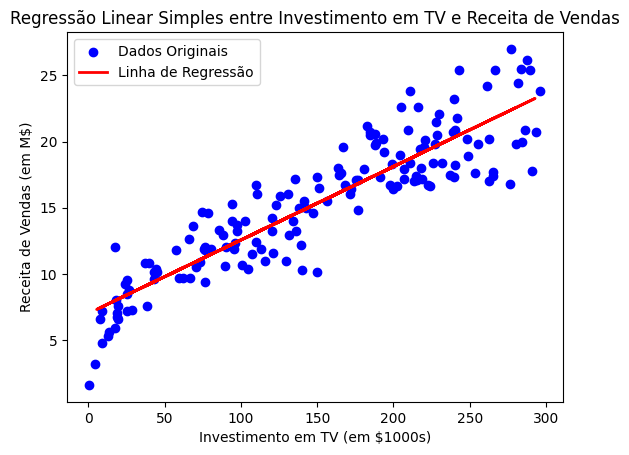

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test)

# Plotar os dados originais e a linha de regressão
plt.scatter(X_train, y_train, color='blue', label='Dados Originais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Regressão Linear Simples entre Investimento em TV e Receita de Vendas')
plt.show()

## Regressão Linear Múltipla

Mean Squared Error: 2.9077569102710896


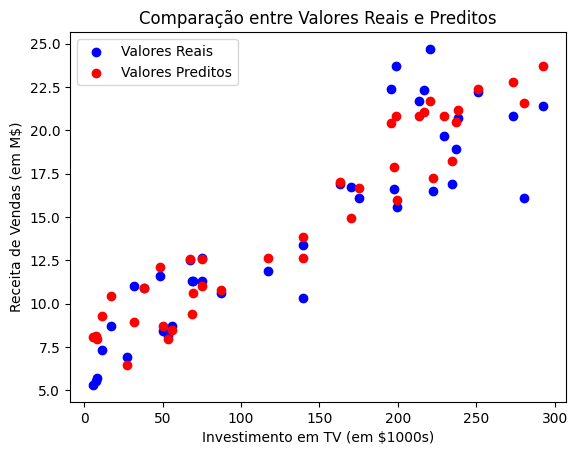

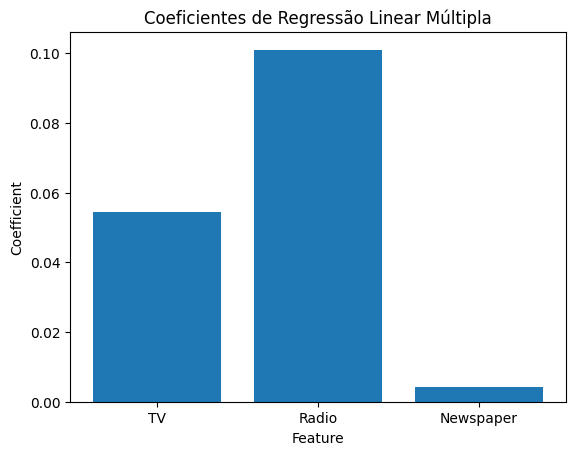

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo (opcional)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Plotar os valores reais
plt.scatter(X_test['TV'], y_test, color='blue', label='Valores Reais')

# Plotar os valores preditos
plt.scatter(X_test['TV'], y_pred, color='red', label='Valores Preditos')

plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

# Plotar os coeficientes do modelo
import matplotlib.pyplot as plt
plt.bar(['TV', 'Radio', 'Newspaper'], model.coef_)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coeficientes de Regressão Linear Múltipla')
plt.show()

O gráfico de barras que foi gerado pelo código mostra os coeficientes da regressão linear múltipla para as três variáveis independentes: TV, rádio e jornal. Cada barra no gráfico representa um coeficiente associado a uma dessas variáveis.

### 1. **TV**
A barra associada à TV mostra o coeficiente para a variável TV. Este coeficiente indica quanto a receita de vendas (em milhões de dólares) é esperada mudar para cada aumento adicional de $1000 investido em publicidade na TV, mantendo todos os outros fatores constantes.

### 2. **Rádio**
Similarmente, a barra associada à rádio indica quanto a receita de vendas é esperada mudar para cada aumento adicional de $1000 investido em publicidade no rádio, com todos os outros fatores mantidos constantes.

### 3. **Jornal**
A barra para a variável jornal mostra o efeito previsto na receita de vendas para cada aumento adicional de $1000 investido em publicidade em jornais, mantendo todos os outros fatores constantes.

Os coeficientes podem ser positivos ou negativos. Um coeficiente positivo significa que há uma relação positiva entre a variável e as vendas, ou seja, um aumento no investimento em publicidade para essa mídia está associado a um aumento nas vendas. Um coeficiente negativo indicaria uma relação negativa.

O tamanho absoluto das barras dá uma indicação da força da relação entre cada variável e as vendas. Por exemplo, se a barra para a TV for significativamente maior do que as outras, isso sugere que o investimento em publicidade na TV tem um efeito maior na receita de vendas do que o investimento em rádio ou jornal.

Em suma, este gráfico fornece uma representação visual da magnitude e direção dos efeitos das diferentes variáveis independentes no modelo de regressão. Isso pode ajudar a entender quais variáveis têm os maiores efeitos sobre a variável dependente e em que direção.


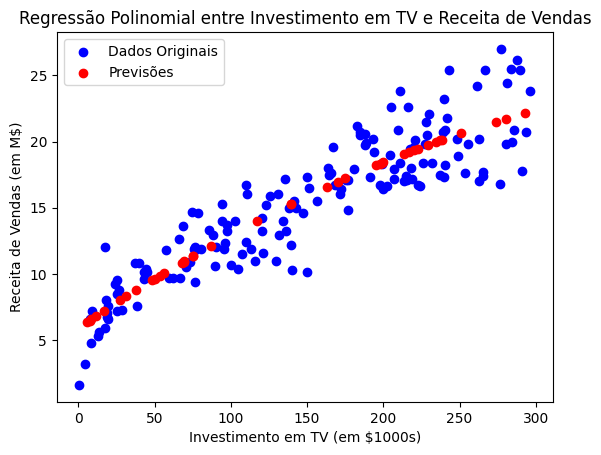

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar as características usando PolynomialFeatures
poly = PolynomialFeatures(degree=2) # Grau 2 para uma parábola
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Inicializar e ajustar o modelo de regressão linear com as características polinomiais
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test_poly)

# Plotar os dados originais e a curva de regressão polinomial
plt.scatter(X_train, y_train, color='blue', label='Dados Originais')
plt.scatter(X_test, y_pred, color='red', label='Previsões')
plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Regressão Polinomial entre Investimento em TV e Receita de Vendas')
plt.show()


## Um exemplo mais prático:
A base de dados abaixo nos retorna dados com vários atributos e no final qual foi o valor do bitcoin no dia.
Cada linha (registro) possui os valores de um dia específico, de 2009 até um dia antes do dia atual.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\2004688158.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,2023-08-02,1069904.0,8961.0,2998944.0,19793847.0,983.0,553314.0,9249756.0,42.0,101125.0,...,4.531846e+09,0.295618,8615.229546,0.001572,45.804001,15.070392,0.023953,0.012743,29696.62,coinbase-btc-usd-spot
5325,2023-08-03,1030326.0,8968.0,2999668.0,19800095.0,986.0,553420.0,9252262.0,42.0,101155.0,...,3.625496e+09,0.222076,6482.915237,0.001254,36.596691,14.899928,0.023950,0.012656,29164.22,coinbase-btc-usd-spot
5326,2023-08-04,912508.0,8966.0,2999687.0,19821314.0,987.0,553265.0,9254709.0,42.0,101125.0,...,2.977303e+09,0.219047,6364.895395,0.001758,51.070157,14.767383,0.023914,0.012577,29173.20,coinbase-btc-usd-spot
5327,2023-08-05,992041.0,8962.0,2999843.0,19818193.0,986.0,553250.0,9250955.0,42.0,101112.0,...,2.402318e+09,0.147473,4284.549093,0.000517,15.020450,14.591791,0.023901,0.012231,29076.48,coinbase-btc-usd-spot


# Como podemos fazer para prever o valor do dia seguinte?
Se nossa classe alvo não existe (valor do dia seguinte)

In [11]:
lista_original = [1,2,3,4]
lista = [1,2,3,4]
print('Lista original', lista)

# Exclui o primeiro registro da lista
lista.pop(0)
print('Lista sem o primeiro registro', lista)

# Acrescenta zero ao último valor da lista
lista.append(0)
print('Lista com 0 na última posição', lista)

df_exemplo = pd.DataFrame()
df_exemplo['Valor Original'] = lista_original
df_exemplo['Valor Alterado'] = lista
df_exemplo

Lista original [1, 2, 3, 4]
Lista sem o primeiro registro [2, 3, 4]
Lista com 0 na última posição [2, 3, 4, 0]


,Valor Original,Valor Alterado
0,1,2
1,2,3
2,3,4
3,4,0


Se considerarmos que cada dia é uma linha, agora temos a coluna valor Alterado com o valor do dia seguinte

In [12]:
df.shape

(5329, 147)

In [13]:
# Cria uma lista com os valores do preço do bitcoin nos dias
lista_preco = list(df['PriceUSD'].values)

# Remove o primeiro elemento desta lista
lista_preco.pop(0)

#Acrescenta 0 no final
lista_preco.append(0)

# Cria a coluna preco_dia_seguinte e acrescenta a lista que alteramos
df['preco_dia_seguinte'] = lista_preco

df.shape

(5329, 148)

In [14]:
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Apagar nulos na coluna PriceUSD
df.dropna(subset=['PriceUSD'], inplace = True)

# Apagar nulos na coluna preco_dia_seguinte
df.dropna(subset=['preco_dia_seguinte'], inplace = True)
df.shape

(4766, 148)

In [16]:
# Apagar todas colunas com mais de 1 valor nulo
null_counts = df.isnull().sum()
colunas_apagar = null_counts[null_counts > 1].index.tolist()
colunas_apagar

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [17]:
df.drop(colunas_apagar, axis = 1, inplace = True)
df.shape

(4766, 137)

In [18]:
df['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [19]:
df['time'] = pd.to_datetime(df['time'])
df['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [20]:
df['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [21]:
# Criar as colunas de data
df['ano'] = df['time'].dt.year
df['mes'] = df['time'].dt.month
df['dia'] = df['time'].dt.day
df['dia_semana'] = df['time'].dt.day_of_week
df['dia_ano'] = df['time'].dt.day_of_year

No geral, tem como colocar uma data no modelo de machine learning?

In [22]:
df[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [23]:
# Cria um dataframe com as datas apenas para plotar os gráficos com as datas
datas = df[['time']].copy(deep=True)

# Exclui a coluna de data da base
df.drop(['time'], axis = 1, inplace  = True)

In [24]:
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [25]:
# Identificar as colunas com pouca correlação ao preco_dia_seguinte
colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]
colunas_remover

['AdrBal1in100KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMedNtv',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowOutExNtv',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct30d',
 'SplyAct7d',
 'SplyAct90d',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv10K',
 'SplyAdrTop100',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv']

In [26]:
# Apagar as colunas com pouca correlação ao preco_dia_seguinte
df.drop(colunas_remover, axis=1, inplace = True)
df.shape

(4766, 112)

In [27]:
# Exclui todas as linhas que possuem ao menos 1 registro nulo
df.dropna(inplace=True)
df.shape

(4765, 112)

In [28]:
X = df.drop(['preco_dia_seguinte'], axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

# Isto é apenas para plotar gráficos de datas com as previsões
X_train_data, X_temp_data, y_train_data, y_temp_data = train_test_split(datas['time'],datas['time'], shuffle=True, test_size=0.30, random_state=50)
X_test_data, X_val_data, y_test_data, y_val_data = train_test_split(X_temp_data, y_temp_data, shuffle=True, test_size=0.5, random_state=50)

## Define o Modelo

In [29]:
input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo

In [30]:
# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

In [31]:
predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

23/23 [==============================] - 0s 2ms/step


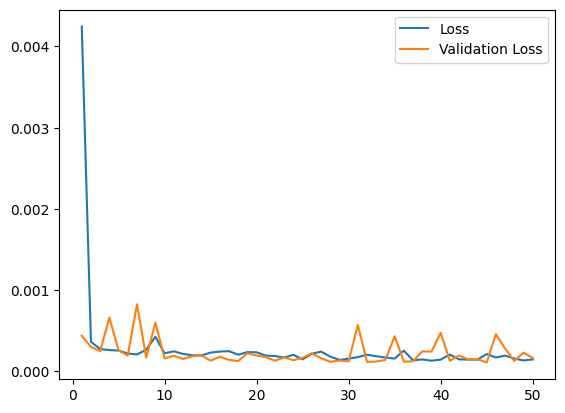

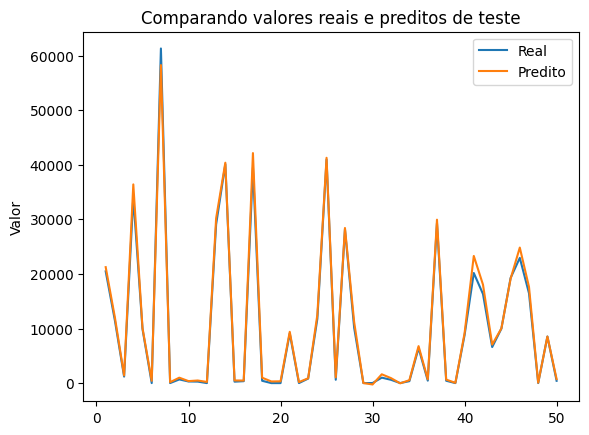

In [32]:
loss_history = history.history['loss']
val_loss_history = history.history['val_loss'] 

# Definimos os valores do eixo x (as épocas)
x = [y+1 for y in range(0,len(loss_history))]

plt.plot(x, loss_history, label = "Loss")
plt.plot(x, val_loss_history, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x = [x for x in range(1,len(y_test_desnormalizado[:50])+1)]
plt.plot(grafico_x, y_test_desnormalizado[:50], label='Real')
plt.plot(grafico_x, predict_desnormalizado[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [33]:
import sklearn.metrics as sm
import numpy as np
# Função Joker para avaliar modelos de regressão
def metrics(X_test,predict, real):
    k = X_test.shape[1]
    n = len(X_test)
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    print('Root Mean Square Error: ',round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2),2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict ),2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict ),2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict ),2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict)*100,2))
    print('R2 score:', round(sm.r2_score(real, predict)*100,2))
    print('Adjusted R2 =', round(adj_r2,3)*100)

In [34]:
metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

Root Mean Square Error:  463.81
Mean Square Error: 762791.49
Mean Absolut Error: 567.93
Median Absolut Error: 339.91
Explain Variance Score: 99.79
R2 score: 99.7
Adjusted R2 = 99.6


In [35]:
df_predito = pd.DataFrame()
df_predito['Data'] = X_test_data
df_predito['Real'] = list(y_test_desnormalizado.flatten())
df_predito['Predito'] = list(predict_desnormalizado.flatten())
df_predito.sort_values(by='Real', inplace=True)

In [36]:
df_predito

,Data,Real,Predito
1238,2012-05-25,0.056000,387.061340
4322,2020-11-03,0.060000,230.954895
1086,2011-12-25,0.060012,-157.738541
3643,2018-12-25,0.060593,300.868195
1307,2012-08-02,0.060850,172.050537
...,...,...,...
5293,2023-07-02,61742.916532,63957.988281
4347,2020-11-28,61977.057551,62546.773438
5213,2023-04-13,62230.805569,61723.164062
1259,2012-06-15,62869.495587,63395.804688


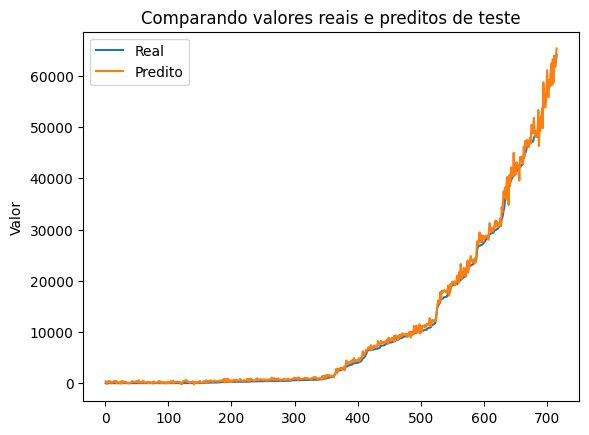

In [37]:
grafico_x = [x for x in range(1,len(df_predito)+1)]
plt.plot(grafico_x, df_predito.Real, label='Real')
plt.plot(grafico_x, df_predito.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste')
plt.legend()
plt.ylabel('Valor')
plt.show()

# Exercício

1 - BITCOIN - Utilize a mesma estrutura de modelo para os exercícios de A até F

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

* A ) Treine um modelo para realizar a previsão do valor do bitcoin sem remover as colunas menos relevantes e exiba as métricas

In [39]:
df_A = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_A.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\1677355664.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_A = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_A.shape

(5329, 147)

In [41]:
lista_preco_A = list(df_A['PriceUSD'].values)

lista_preco_A.pop(0)

lista_preco_A.append(0)

df_A['preco_dia_seguinte'] = lista_preco_A

df_A.shape

(5329, 148)

In [42]:
df_A.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_A.dropna(subset = ['PriceUSD'], inplace = True)

df_A.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_A.shape

(4766, 148)

In [44]:
null_counts_A = df_A.isnull().sum()
colunas_apagar_A = null_counts_A[null_counts_A > 1].index.tolist()
colunas_apagar_A

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [45]:
df_A.drop(colunas_apagar_A, axis = 1, inplace = True)
df_A.shape

(4766, 137)

In [46]:
df_A['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [47]:
df_A['time'] = pd.to_datetime(df_A['time'])
df_A['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [48]:
df_A['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [49]:
df_A['ano'] = df_A['time'].dt.year
df_A['mes'] = df_A['time'].dt.month
df_A['dia'] = df_A['time'].dt.day
df_A['dia_semana'] = df_A['time'].dt.day_of_week
df_A['dia_ano'] = df_A['time'].dt.day_of_year

In [50]:
df_A[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [51]:
datas_A = df_A[['time']].copy(deep = True)

df_A.drop(['time'], axis = 1, inplace = True)

In [52]:
df_A.shape

(4766, 141)

In [53]:
df_A.dropna(inplace = True)
df_A.shape

(4765, 141)

In [54]:
X_A = df_A.drop(['preco_dia_seguinte'], axis = 1)
y_A = df_A[['preco_dia_seguinte']]

scale_X_A = MinMaxScaler()
X_A = scale_X_A.fit_transform(X_A)

scale_y_A = MinMaxScaler()
y_A = scale_y_A.fit_transform(y_A)


X_train_A, X_temp_A, y_train_A, y_temp_A = train_test_split(X_A, y_A, shuffle = True, test_size = 0.30, random_state = 50)
X_test_A, X_val_A, y_test_A, y_val_A = train_test_split(X_temp_A, y_temp_A, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_A, X_temp_data_A, y_train_data_A, y_temp_data_A = train_test_split(datas_A['time'], datas_A['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_A, X_val_data_A, y_test_data_A, y_val_data_A = train_test_split(X_temp_data_A, y_temp_data_A, shuffle = True, test_size = 0.5, random_state = 50)

In [55]:
input_dim_A = X_A.shape[1]

model_A = Sequential()
model_A.add(Dense(64, input_dim = input_dim_A, activation = 'relu'))
model_A.add(Dense(32, activation = 'relu'))
model_A.add(Dense(1, activation = 'linear'))
model_A.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
history_A = model_A.fit(X_train_A, y_train_A, epochs = 50, validation_data = (X_val_A, y_val_A), verbose = 0)

In [57]:
predict_A = model_A.predict(X_test_A)
y_test_desnormalizado_A = scale_y_A.inverse_transform(y_test_A)

predict_desnormalizado_A = scale_y_A.inverse_transform(predict_A)

23/23 [==============================] - 0s 2ms/step


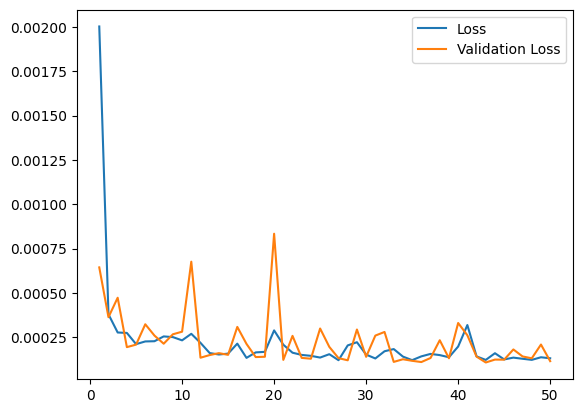

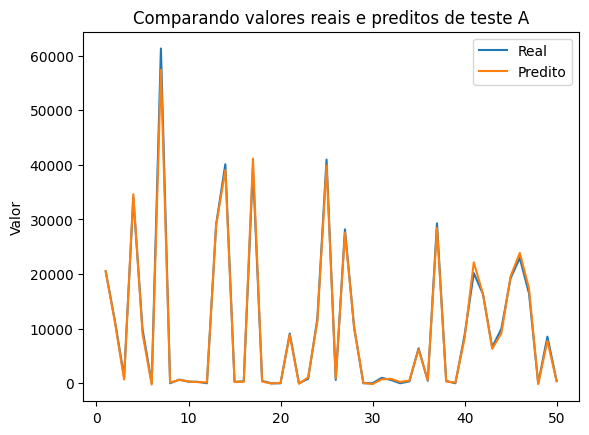

In [58]:
loss_history_A = history_A.history['loss']
val_loss_history_A = history_A.history['val_loss'] 

x_A = [y_A+1 for y_A in range(0,len(loss_history_A))]

plt.plot(x_A, loss_history_A, label = "Loss")
plt.plot(x_A, val_loss_history_A, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_A = [x_A for x_A in range(1,len(y_test_desnormalizado_A[:50])+1)]
plt.plot(grafico_x_A, y_test_desnormalizado_A[:50], label='Real')
plt.plot(grafico_x_A, predict_desnormalizado_A[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste A')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [59]:
def metrics(X_test,predict, real):
    k = X_test.shape[1]
    n = len(X_test)
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    print('Root Mean Square Error: ',round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2),2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict ),2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict ),2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict ),2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict)*100,2))
    print('R2 score:', round(sm.r2_score(real, predict)*100,2))
    print('Adjusted R2 =', round(adj_r2,3)*100)

In [60]:
metrics(X_test_A, predict_desnormalizado_A, y_test_desnormalizado_A)

Root Mean Square Error:  116.29
Mean Square Error: 552264.33
Mean Absolut Error: 428.25
Median Absolut Error: 218.13
Explain Variance Score: 99.79
R2 score: 99.79
Adjusted R2 = 99.7


In [61]:
df_predito_A = pd.DataFrame()
df_predito_A['Data'] = X_test_data_A
df_predito_A['Real'] = list(y_test_desnormalizado_A.flatten())
df_predito_A['Predito'] = list(predict_desnormalizado_A.flatten())
df_predito_A.sort_values(by = 'Real', inplace = True)

In [62]:
df_predito_A

,Data,Real,Predito
1238,2012-05-25,0.056000,232.941544
4322,2020-11-03,0.060000,329.820618
1086,2011-12-25,0.060012,277.531036
3643,2018-12-25,0.060593,-49.714363
1307,2012-08-02,0.060850,52.412617
...,...,...,...
5293,2023-07-02,61742.916532,63146.675781
4347,2020-11-28,61977.057551,61891.082031
5213,2023-04-13,62230.805569,60937.609375
1259,2012-06-15,62869.495587,62693.804688


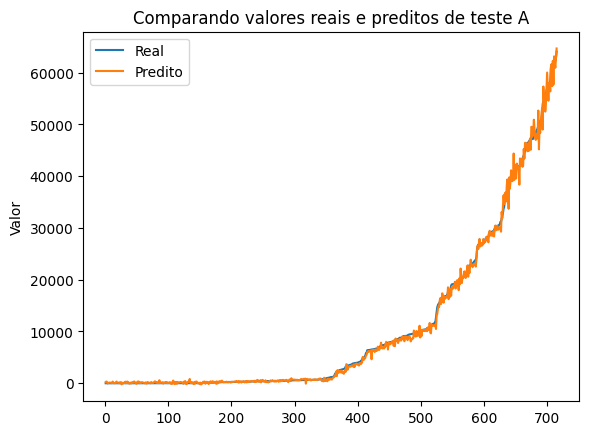

In [63]:
grafico_x_A = [x_A for x_A in range(1,len(df_predito_A)+1)]
plt.plot(grafico_x_A, df_predito_A.Real, label='Real')
plt.plot(grafico_x_A, df_predito_A.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste A')
plt.legend()
plt.ylabel('Valor')
plt.show()

* B ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.3) & (correlation_matrix <= 0.3) e exiba as métricas

In [64]:
df_B = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_B.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\186243768.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_B = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_B.shape

(5329, 147)

In [66]:
lista_preco_B = list(df_B['PriceUSD'].values)

lista_preco_B.pop(0)

lista_preco_B.append(0)

df_B['preco_dia_seguinte'] = lista_preco_B

df_B.shape

(5329, 148)

In [67]:
df_B.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_B.dropna(subset = ['PriceUSD'], inplace = True)

df_B.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_B.shape

(4766, 148)

In [69]:
null_counts_B = df_B.isnull().sum()
colunas_apagar_B = null_counts_B[null_counts_B > 1].index.tolist()
colunas_apagar_B

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [70]:
df_B.drop(colunas_apagar_B, axis = 1, inplace = True)
df_B.shape

(4766, 137)

In [71]:
df_B['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [72]:
df_B['time'] = pd.to_datetime(df_B['time'])
df_B['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [73]:
df_B['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [74]:
df_B['ano'] = df_B['time'].dt.year
df_B['mes'] = df_B['time'].dt.month
df_B['dia'] = df_B['time'].dt.day
df_B['dia_semana'] = df_B['time'].dt.day_of_week
df_B['dia_ano'] = df_B['time'].dt.day_of_year

In [75]:
df_B[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [76]:
datas_B = df_B[['time']].copy(deep = True)

df_B.drop(['time'], axis = 1, inplace = True)

In [77]:
correlation_matrix_B = df_B.corr()['preco_dia_seguinte']
correlation_matrix_B

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [78]:
colunas_interesse_B = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover_B = correlation_matrix_B[(correlation_matrix_B >= -0.3) & (correlation_matrix_B <= 0.3)].index.tolist()
colunas_remover_B = [coluna for coluna in colunas_remover_B if coluna not in colunas_interesse_B]
colunas_remover_B

['AdrBal1in100KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMedNtv',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowOutExNtv',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct30d',
 'SplyAct7d',
 'SplyAct90d',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv10K',
 'SplyAdrTop100',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv']

In [79]:
df_B.drop(colunas_remover_B, axis = 1, inplace = True)
df_B.shape

(4766, 112)

In [80]:
df_B.dropna(inplace = True)
df_B.shape

(4765, 112)

In [81]:
X_B = df_B.drop(['preco_dia_seguinte'], axis = 1)
y_B = df_B[['preco_dia_seguinte']]

scale_X_B = MinMaxScaler()
X_B = scale_X_B.fit_transform(X_B)

scale_y_B = MinMaxScaler()
y_B = scale_y_B.fit_transform(y_B)


X_train_B, X_temp_B, y_train_B, y_temp_B = train_test_split(X_B, y_B, shuffle = True, test_size = 0.30, random_state = 50)
X_test_B, X_val_B, y_test_B, y_val_B = train_test_split(X_temp_B, y_temp_B, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_B, X_temp_data_B, y_train_data_B, y_temp_data_B = train_test_split(datas_B['time'], datas_B['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_B, X_val_data_B, y_test_data_B, y_val_data_B = train_test_split(X_temp_data_B, y_temp_data_B, shuffle = True, test_size = 0.5, random_state = 50)

In [82]:
input_dim_B = X_B.shape[1]

model_B = Sequential()
model_B.add(Dense(64, input_dim = input_dim_B, activation = 'relu'))
model_B.add(Dense(32, activation = 'relu'))
model_B.add(Dense(1, activation = 'linear'))
model_B.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [83]:
history_B = model_B.fit(X_train_B, y_train_B, epochs = 50, validation_data = (X_val_B, y_val_B), verbose = 0)

In [84]:
predict_B = model_B.predict(X_test_B)
y_test_desnormalizado_B = scale_y_B.inverse_transform(y_test_B)

predict_desnormalizado_B = scale_y_B.inverse_transform(predict_B)

23/23 [==============================] - 0s 2ms/step


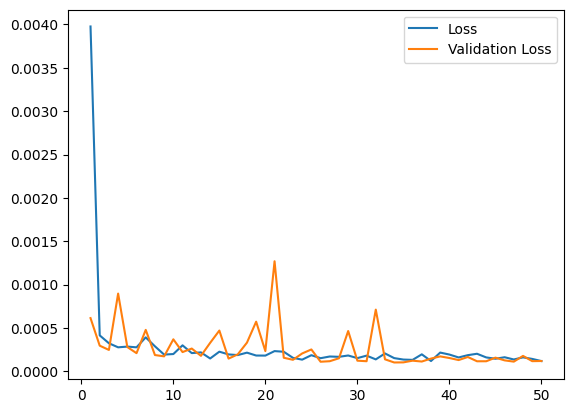

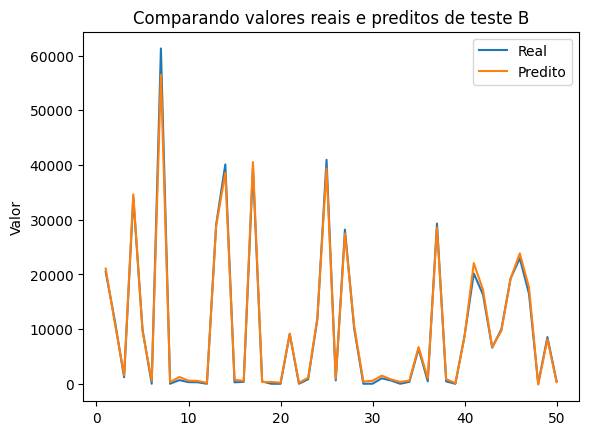

In [85]:
loss_history_B = history_B.history['loss']
val_loss_history_B = history_B.history['val_loss'] 

x_B = [y_B+1 for y_B in range(0,len(loss_history_B))]

plt.plot(x_B, loss_history_B, label = "Loss")
plt.plot(x_B, val_loss_history_B, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_B = [x_B for x_B in range(1,len(y_test_desnormalizado_B[:50])+1)]
plt.plot(grafico_x_B, y_test_desnormalizado_B[:50], label='Real')
plt.plot(grafico_x_B, predict_desnormalizado_B[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste B')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [86]:
metrics(X_test_B, predict_desnormalizado_B, y_test_desnormalizado_B)

Root Mean Square Error:  65.83
Mean Square Error: 677254.98
Mean Absolut Error: 506.75
Median Absolut Error: 321.08
Explain Variance Score: 99.74
R2 score: 99.74
Adjusted R2 = 99.7


In [87]:
df_predito_B = pd.DataFrame()
df_predito_B['Data'] = X_test_data_B
df_predito_B['Real'] = list(y_test_desnormalizado_B.flatten())
df_predito_B['Predito'] = list(predict_desnormalizado_B.flatten())
df_predito_B.sort_values(by = 'Real', inplace = True)

In [88]:
df_predito_B

,Data,Real,Predito
1238,2012-05-25,0.056000,269.302979
4322,2020-11-03,0.060000,443.194244
1086,2011-12-25,0.060012,446.026520
3643,2018-12-25,0.060593,332.126587
1307,2012-08-02,0.060850,85.832100
...,...,...,...
5293,2023-07-02,61742.916532,61252.617188
4347,2020-11-28,61977.057551,59994.273438
5213,2023-04-13,62230.805569,59087.820312
1259,2012-06-15,62869.495587,61200.808594


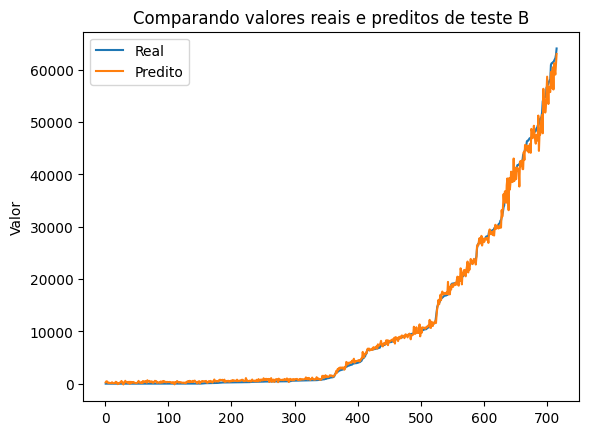

In [89]:
grafico_x_B = [x_B for x_B in range(1,len(df_predito_B)+1)]
plt.plot(grafico_x_B, df_predito_B.Real, label='Real')
plt.plot(grafico_x_B, df_predito_B.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste B')
plt.legend()
plt.ylabel('Valor')
plt.show()

* C ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.4) & (correlation_matrix <= 0.4) e exiba as métricas

In [90]:
df_C = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_C.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\1601364316.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_C = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_C.shape

(5329, 147)

In [92]:
lista_preco_C = list(df_C['PriceUSD'].values)

lista_preco_C.pop(0)

lista_preco_C.append(0)

df_C['preco_dia_seguinte'] = lista_preco_C

df_C.shape

(5329, 148)

In [93]:
df_C.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_C.dropna(subset = ['PriceUSD'], inplace = True)

df_C.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_C.shape

(4766, 148)

In [95]:
null_counts_C = df_C.isnull().sum()
colunas_apagar_C = null_counts_C[null_counts_C > 1].index.tolist()
colunas_apagar_C

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [96]:
df_C.drop(colunas_apagar_C, axis = 1, inplace = True)
df_C.shape

(4766, 137)

In [97]:
df_C['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [98]:
df_C['time'] = pd.to_datetime(df_C['time'])
df_C['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [99]:
df_C['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [100]:
df_C['ano'] = df_C['time'].dt.year
df_C['mes'] = df_C['time'].dt.month
df_C['dia'] = df_C['time'].dt.day
df_C['dia_semana'] = df_C['time'].dt.day_of_week
df_C['dia_ano'] = df_C['time'].dt.day_of_year

In [101]:
df_C[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [102]:
datas_C = df_C[['time']].copy(deep = True)

df_C.drop(['time'], axis = 1, inplace = True)

In [103]:
correlation_matrix_C = df_C.corr()['preco_dia_seguinte']
correlation_matrix_C

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [104]:
colunas_interesse_C = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover_C = correlation_matrix_C[(correlation_matrix_C >= -0.4) & (correlation_matrix_C <= 0.4)].index.tolist()
colunas_remover_C = [coluna for coluna in colunas_remover_C if coluna not in colunas_interesse_C]
colunas_remover_C

['AdrBal1in100KCnt',
 'AdrBal1in10KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv100Cnt',
 'AdrBalNtv100KCnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMedNtv',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowOutExNtv',
 'IssContPctAnn',
 'IssContPctDay',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct1yr',
 'SplyAct2yr',
 'SplyAct30d',
 'SplyAct3yr',
 'SplyAct7d',
 'SplyAct90d',
 'SplyActPct1yr',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv10K',
 'SplyAdrTop100',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv',
 'VelCur1yr']

In [105]:
df_C.drop(colunas_remover_C, axis = 1, inplace = True)
df_C.shape

(4766, 102)

In [106]:
df_C.dropna(inplace = True)
df_C.shape

(4765, 102)

In [107]:
X_C = df_C.drop(['preco_dia_seguinte'], axis = 1)
y_C = df_C[['preco_dia_seguinte']]

scale_X_C = MinMaxScaler()
X_C = scale_X_C.fit_transform(X_C)

scale_y_C = MinMaxScaler()
y_C = scale_y_C.fit_transform(y_C)


X_train_C, X_temp_C, y_train_C, y_temp_C = train_test_split(X_C, y_C, shuffle = True, test_size = 0.30, random_state = 50)
X_test_C, X_val_C, y_test_C, y_val_C = train_test_split(X_temp_C, y_temp_C, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_C, X_temp_data_C, y_train_data_C, y_temp_data_C = train_test_split(datas_C['time'], datas_C['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_C, X_val_data_C, y_test_data_C, y_val_data_C = train_test_split(X_temp_data_C, y_temp_data_C, shuffle = True, test_size = 0.5, random_state = 50)

In [108]:
input_dim_C = X_C.shape[1]

model_C = Sequential()
model_C.add(Dense(64, input_dim = input_dim_C, activation = 'relu'))
model_C.add(Dense(32, activation = 'relu'))
model_C.add(Dense(1, activation = 'linear'))
model_C.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [109]:
history_C = model_C.fit(X_train_C, y_train_C, epochs = 50, validation_data = (X_val_C, y_val_C), verbose = 0)

In [110]:
predict_C = model_C.predict(X_test_C)
y_test_desnormalizado_C = scale_y_C.inverse_transform(y_test_C)

predict_desnormalizado_C = scale_y_C.inverse_transform(predict_C)

23/23 [==============================] - 0s 3ms/step


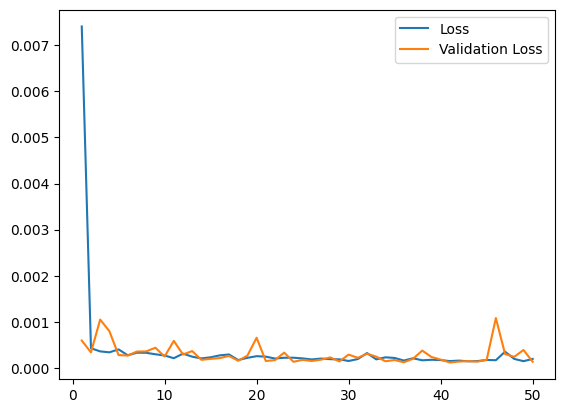

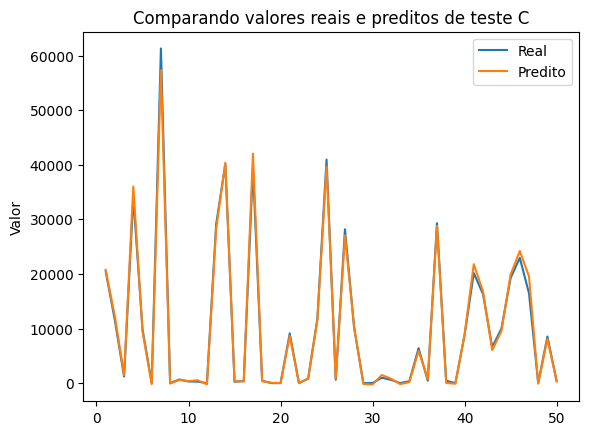

In [111]:
loss_history_C = history_C.history['loss']
val_loss_history_C = history_C.history['val_loss'] 

x_C = [y_C+1 for y_C in range(0,len(loss_history_C))]

plt.plot(x_C, loss_history_C, label = "Loss")
plt.plot(x_C, val_loss_history_C, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_C = [x_C for x_C in range(1,len(y_test_desnormalizado_C[:50])+1)]
plt.plot(grafico_x_C, y_test_desnormalizado_C[:50], label='Real')
plt.plot(grafico_x_C, predict_desnormalizado_C[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste C')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [112]:
metrics(X_test_C, predict_desnormalizado_C, y_test_desnormalizado_C)

Root Mean Square Error:  15.72
Mean Square Error: 600913.56
Mean Absolut Error: 443.2
Median Absolut Error: 230.64
Explain Variance Score: 99.77
R2 score: 99.77
Adjusted R2 = 99.7


In [113]:
df_predito_C = pd.DataFrame()
df_predito_C['Data'] = X_test_data_C
df_predito_C['Real'] = list(y_test_desnormalizado_C.flatten())
df_predito_C['Predito'] = list(predict_desnormalizado_C.flatten())
df_predito_C.sort_values(by = 'Real', inplace = True)

In [114]:
df_predito_C

,Data,Real,Predito
1238,2012-05-25,0.056000,286.364380
4322,2020-11-03,0.060000,231.340759
1086,2011-12-25,0.060012,123.970184
3643,2018-12-25,0.060593,72.567268
1307,2012-08-02,0.060850,14.294322
...,...,...,...
5293,2023-07-02,61742.916532,62652.386719
4347,2020-11-28,61977.057551,61787.902344
5213,2023-04-13,62230.805569,60059.660156
1259,2012-06-15,62869.495587,61790.882812


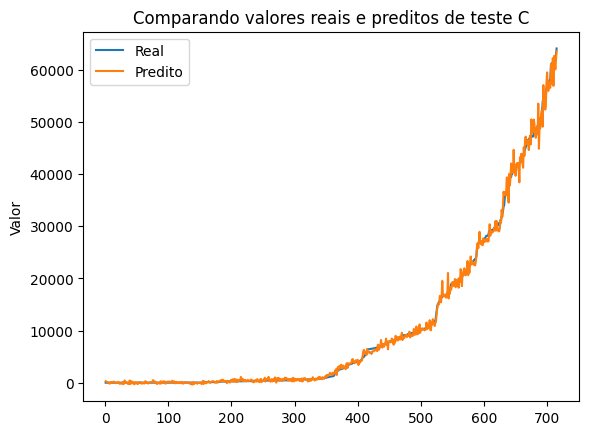

In [115]:
grafico_x_C = [x_C for x_C in range(1,len(df_predito_C)+1)]
plt.plot(grafico_x_C, df_predito_C.Real, label='Real')
plt.plot(grafico_x_C, df_predito_C.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste C')
plt.legend()
plt.ylabel('Valor')
plt.show()

* D ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.5) & (correlation_matrix <= 0.5) e exiba as métricas

In [116]:
df_D = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_D.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\1039921552.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_D = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_D.shape

(5329, 147)

In [118]:
lista_preco_D = list(df_D['PriceUSD'].values)

lista_preco_D.pop(0)

lista_preco_D.append(0)

df_D['preco_dia_seguinte'] = lista_preco_D

df_D.shape

(5329, 148)

In [119]:
df_D.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_D.dropna(subset = ['PriceUSD'], inplace = True)

df_D.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_D.shape

(4766, 148)

In [121]:
null_counts_D = df_D.isnull().sum()
colunas_apagar_D = null_counts_D[null_counts_D > 1].index.tolist()
colunas_apagar_D

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [122]:
df_D.drop(colunas_apagar_D, axis = 1, inplace = True)
df_D.shape

(4766, 137)

In [123]:
df_D['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [124]:
df_D['time'] = pd.to_datetime(df_D['time'])
df_D['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [125]:
df_D['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [126]:
df_D['ano'] = df_D['time'].dt.year
df_D['mes'] = df_D['time'].dt.month
df_D['dia'] = df_D['time'].dt.day
df_D['dia_semana'] = df_D['time'].dt.day_of_week
df_D['dia_ano'] = df_D['time'].dt.day_of_year

In [127]:
df_D[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [128]:
datas_D = df_D[['time']].copy(deep = True)

df_D.drop(['time'], axis = 1, inplace = True)

In [129]:
correlation_matrix_D = df_D.corr()['preco_dia_seguinte']
correlation_matrix_D

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [130]:
colunas_interesse_D = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover_D = correlation_matrix_D[(correlation_matrix_D >= -0.5) & (correlation_matrix_D <= 0.5)].index.tolist()
colunas_remover_D = [coluna for coluna in colunas_remover_D if coluna not in colunas_interesse_D]
colunas_remover_D

['AdrBal1in100KCnt',
 'AdrBal1in10KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv100Cnt',
 'AdrBalNtv100KCnt',
 'AdrBalNtv10Cnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'BlkWghtTot',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMeanUSD',
 'FeeMedNtv',
 'FeeMedUSD',
 'FeeTotNtv',
 'FeeTotUSD',
 'FlowInExNtv',
 'FlowOutExNtv',
 'FlowTfrFromExCnt',
 'IssContPctAnn',
 'IssContPctDay',
 'NDF',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct1yr',
 'SplyAct2yr',
 'SplyAct30d',
 'SplyAct3yr',
 'SplyAct4yr',
 'SplyAct5yr',
 'SplyAct7d',
 'SplyAct90d',
 'SplyActPct1yr',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv100K',
 'SplyAdrBalNtv10K',
 'SplyAdrTop100',
 'SplyFF',
 'SplyMiner0HopAllNtv',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv',
 'VelCur1yr']

In [131]:
df_D.drop(colunas_remover_D, axis = 1, inplace = True)
df_D.shape

(4766, 90)

In [132]:
df_D.dropna(inplace = True)
df_D.shape

(4765, 90)

In [133]:
X_D = df_D.drop(['preco_dia_seguinte'], axis = 1)
y_D = df_D[['preco_dia_seguinte']]

scale_X_D = MinMaxScaler()
X_D = scale_X_D.fit_transform(X_D)

scale_y_D = MinMaxScaler()
y_D = scale_y_D.fit_transform(y_D)


X_train_D, X_temp_D, y_train_D, y_temp_D = train_test_split(X_D, y_D, shuffle = True, test_size = 0.30, random_state = 50)
X_test_D, X_val_D, y_test_D, y_val_D = train_test_split(X_temp_D, y_temp_D, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_D, X_temp_data_D, y_train_data_D, y_temp_data_D = train_test_split(datas_D['time'], datas_D['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_D, X_val_data_D, y_test_data_D, y_val_data_D = train_test_split(X_temp_data_D, y_temp_data_D, shuffle = True, test_size = 0.5, random_state = 50)

In [134]:
input_dim_D = X_D.shape[1]

model_D = Sequential()
model_D.add(Dense(64, input_dim = input_dim_D, activation = 'relu'))
model_D.add(Dense(32, activation = 'relu'))
model_D.add(Dense(1, activation = 'linear'))
model_D.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [135]:
history_D = model_D.fit(X_train_D, y_train_D, epochs = 50, validation_data = (X_val_D, y_val_D), verbose = 0)

In [136]:
predict_D = model_D.predict(X_test_D)
y_test_desnormalizado_D = scale_y_D.inverse_transform(y_test_D)

predict_desnormalizado_D = scale_y_D.inverse_transform(predict_D)

23/23 [==============================] - 0s 2ms/step


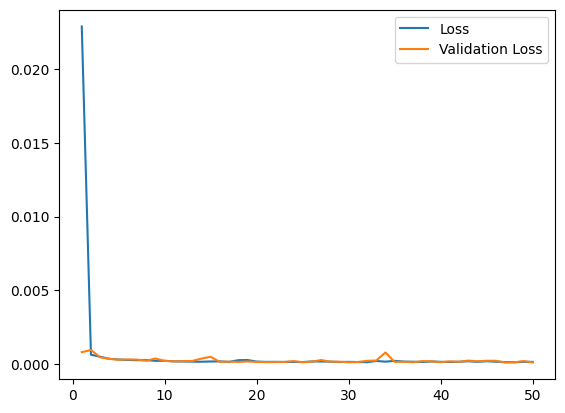

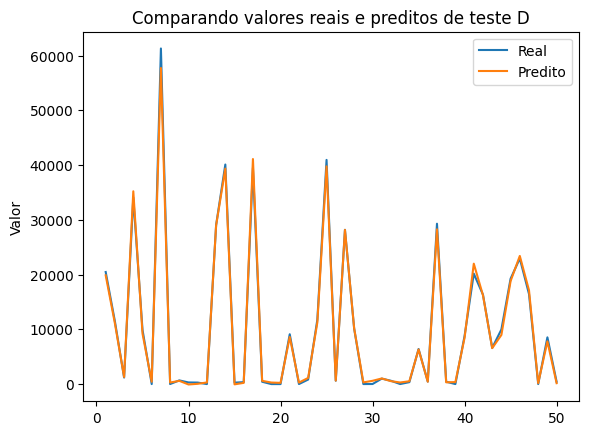

In [137]:
loss_history_D = history_D.history['loss']
val_loss_history_D = history_D.history['val_loss'] 

x_D = [y_D+1 for y_D in range(0,len(loss_history_D))]

plt.plot(x_D, loss_history_D, label = "Loss")
plt.plot(x_D, val_loss_history_D, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_D = [x_D for x_D in range(1,len(y_test_desnormalizado_D[:50])+1)]
plt.plot(grafico_x_D, y_test_desnormalizado_D[:50], label='Real')
plt.plot(grafico_x_D, predict_desnormalizado_D[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste D')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [138]:
metrics(X_test_D, predict_desnormalizado_D, y_test_desnormalizado_D)

Root Mean Square Error:  68.1
Mean Square Error: 520113.95
Mean Absolut Error: 410.81
Median Absolut Error: 206.48
Explain Variance Score: 99.8
R2 score: 99.8
Adjusted R2 = 99.8


In [139]:
df_predito_D = pd.DataFrame()
df_predito_D['Data'] = X_test_data_D
df_predito_D['Real'] = list(y_test_desnormalizado_D.flatten())
df_predito_D['Predito'] = list(predict_desnormalizado_D.flatten())
df_predito_D.sort_values(by = 'Real', inplace = True)

In [140]:
df_predito_D

,Data,Real,Predito
1238,2012-05-25,0.056000,-33.559853
4322,2020-11-03,0.060000,175.986023
1086,2011-12-25,0.060012,88.410675
3643,2018-12-25,0.060593,282.416077
1307,2012-08-02,0.060850,228.219391
...,...,...,...
5293,2023-07-02,61742.916532,62102.625000
4347,2020-11-28,61977.057551,61266.148438
5213,2023-04-13,62230.805569,60169.000000
1259,2012-06-15,62869.495587,62225.906250


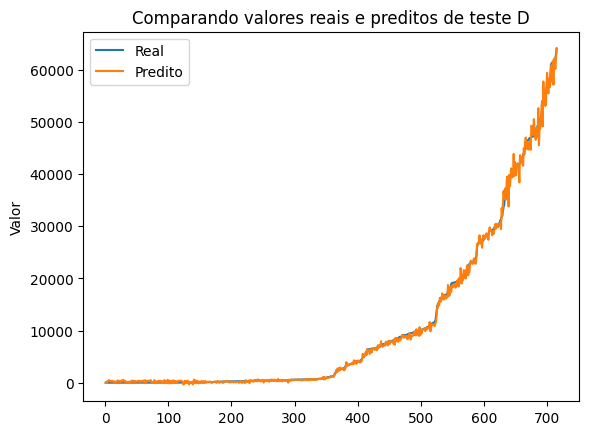

In [141]:
grafico_x_D = [x_D for x_D in range(1,len(df_predito_D)+1)]
plt.plot(grafico_x_D, df_predito_D.Real, label='Real')
plt.plot(grafico_x_D, df_predito_D.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste D')
plt.legend()
plt.ylabel('Valor')
plt.show()

* E ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.6) & (correlation_matrix <= 0.6) e exiba as métricas

In [142]:
df_E = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_E.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\4286009707.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_E = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_E.shape

(5329, 147)

In [144]:
lista_preco_E = list(df_E['PriceUSD'].values)

lista_preco_E.pop(0)

lista_preco_E.append(0)

df_E['preco_dia_seguinte'] = lista_preco_E

df_E.shape

(5329, 148)

In [145]:
df_E.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_E.dropna(subset = ['PriceUSD'], inplace = True)

df_E.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_E.shape

(4766, 148)

In [147]:
null_counts_E = df_E.isnull().sum()
colunas_apagar_E = null_counts_E[null_counts_E > 1].index.tolist()
colunas_apagar_E

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [148]:
df_E.drop(colunas_apagar_E, axis = 1, inplace = True)
df_E.shape

(4766, 137)

In [149]:
df_E['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [150]:
df_E['time'] = pd.to_datetime(df_E['time'])
df_E['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [151]:
df_E['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [152]:
df_E['ano'] = df_E['time'].dt.year
df_E['mes'] = df_E['time'].dt.month
df_E['dia'] = df_E['time'].dt.day
df_E['dia_semana'] = df_E['time'].dt.day_of_week
df_E['dia_ano'] = df_E['time'].dt.day_of_year

In [153]:
df_E[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [154]:
datas_E = df_E[['time']].copy(deep = True)

df_E.drop(['time'], axis = 1, inplace = True)

In [155]:
correlation_matrix_E = df_E.corr()['preco_dia_seguinte']
correlation_matrix_E

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [156]:
colunas_interesse_E = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover_E = correlation_matrix_E[(correlation_matrix_E >= -0.6) & (correlation_matrix_E <= 0.6)].index.tolist()
colunas_remover_E = [coluna for coluna in colunas_remover_E if coluna not in colunas_interesse_E]
colunas_remover_E

['AdrBal1in100KCnt',
 'AdrBal1in10KCnt',
 'AdrBal1in1KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv100Cnt',
 'AdrBalNtv100KCnt',
 'AdrBalNtv10Cnt',
 'AdrBalNtv10KCnt',
 'AdrBalNtv1KCnt',
 'AssetEODCompletionTime',
 'BlkCnt',
 'BlkWghtMean',
 'BlkWghtTot',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMeanUSD',
 'FeeMedNtv',
 'FeeMedUSD',
 'FeeTotNtv',
 'FeeTotUSD',
 'FlowInExNtv',
 'FlowOutExNtv',
 'FlowTfrFromExCnt',
 'IssContNtv',
 'IssContPctAnn',
 'IssContPctDay',
 'IssTotNtv',
 'NDF',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'RevNtv',
 'SplyAct10yr',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct1yr',
 'SplyAct2yr',
 'SplyAct30d',
 'SplyAct3yr',
 'SplyAct4yr',
 'SplyAct5yr',
 'SplyAct7d',
 'SplyAct90d',
 'SplyActEver',
 'SplyActPct1yr',
 'SplyAdrBal1in100K',
 'SplyAdrBal1in100M',
 'SplyAdrBal1in10B',
 'SplyAdrBal1in10K',
 'SplyAdrBal1in10M',
 'SplyAdrBal1in1B',
 'SplyAdrBal1in1K',
 'SplyAdrBal1in1M',
 'SplyAdrBalNtv0.001',


In [157]:
df_E.drop(colunas_remover_E, axis = 1, inplace = True)
df_E.shape

(4766, 56)

In [158]:
df_E.dropna(inplace = True)
df_E.shape

(4765, 56)

In [159]:
X_E = df_E.drop(['preco_dia_seguinte'], axis = 1)
y_E = df_E[['preco_dia_seguinte']]

scale_X_E = MinMaxScaler()
X_E = scale_X_E.fit_transform(X_E)

scale_y_E = MinMaxScaler()
y_E = scale_y_E.fit_transform(y_E)


X_train_E, X_temp_E, y_train_E, y_temp_E = train_test_split(X_E, y_E, shuffle = True, test_size = 0.30, random_state = 50)
X_test_E, X_val_E, y_test_E, y_val_E = train_test_split(X_temp_E, y_temp_E, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_E, X_temp_data_E, y_train_data_E, y_temp_data_E = train_test_split(datas_E['time'], datas_E['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_E, X_val_data_E, y_test_data_E, y_val_data_E = train_test_split(X_temp_data_E, y_temp_data_E, shuffle = True, test_size = 0.5, random_state = 50)

In [160]:
input_dim_E = X_E.shape[1]

model_E = Sequential()
model_E.add(Dense(64, input_dim = input_dim_E, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(1, activation = 'linear'))
model_E.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [161]:
history_E = model_E.fit(X_train_E, y_train_E, epochs = 50, validation_data = (X_val_E, y_val_E), verbose = 0)

In [162]:
predict_E = model_E.predict(X_test_E)
y_test_desnormalizado_E = scale_y_E.inverse_transform(y_test_E)

predict_desnormalizado_E = scale_y_E.inverse_transform(predict_E)

23/23 [==============================] - 0s 3ms/step


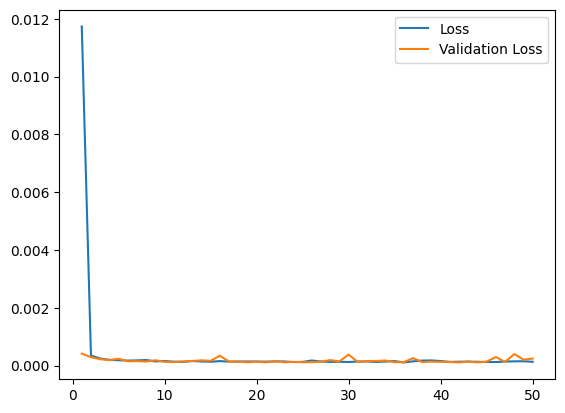

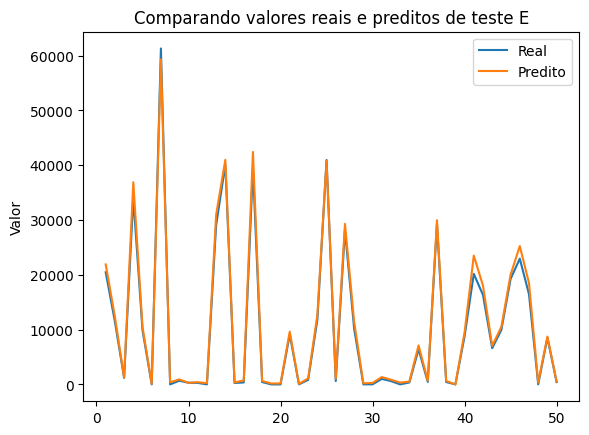

In [163]:
loss_history_E = history_E.history['loss']
val_loss_history_E = history_E.history['val_loss'] 

x_E = [y_E+1 for y_E in range(0,len(loss_history_E))]

plt.plot(x_E, loss_history_E, label = "Loss")
plt.plot(x_E, val_loss_history_E, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_E = [x_E for x_E in range(1,len(y_test_desnormalizado_E[:50])+1)]
plt.plot(grafico_x_E, y_test_desnormalizado_E[:50], label='Real')
plt.plot(grafico_x_E, predict_desnormalizado_E[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [164]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  617.05
Mean Square Error: 1100330.31
Mean Absolut Error: 689.72
Median Absolut Error: 352.42
Explain Variance Score: 99.72
R2 score: 99.57
Adjusted R2 = 99.5


In [165]:
df_predito_E = pd.DataFrame()
df_predito_E['Data'] = X_test_data_E
df_predito_E['Real'] = list(y_test_desnormalizado_E.flatten())
df_predito_E['Predito'] = list(predict_desnormalizado_E.flatten())
df_predito_E.sort_values(by = 'Real', inplace = True)

In [166]:
df_predito_E

,Data,Real,Predito
1238,2012-05-25,0.056000,333.476166
4322,2020-11-03,0.060000,197.168655
1086,2011-12-25,0.060012,11.832419
3643,2018-12-25,0.060593,170.859039
1307,2012-08-02,0.060850,67.565590
...,...,...,...
5293,2023-07-02,61742.916532,63969.035156
4347,2020-11-28,61977.057551,62994.273438
5213,2023-04-13,62230.805569,61863.281250
1259,2012-06-15,62869.495587,64110.785156


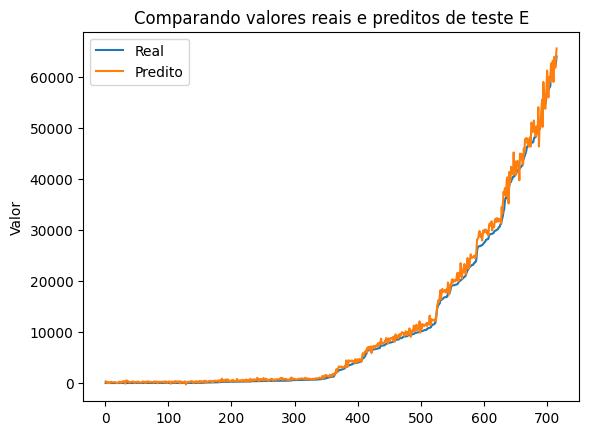

In [167]:
grafico_x_E = [x_E for x_E in range(1,len(df_predito_E)+1)]
plt.plot(grafico_x_E, df_predito_E.Real, label='Real')
plt.plot(grafico_x_E, df_predito_E.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

* F ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.7) & (correlation_matrix <= 0.7) e exiba as métricas

In [168]:
df_F = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df_F.head(3)

C:\Users\xx\AppData\Local\Temp\ipykernel_12336\3642862498.py:1: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_F = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df_F.shape

(5329, 147)

In [170]:
lista_preco_F = list(df_F['PriceUSD'].values)

lista_preco_F.pop(0)

lista_preco_F.append(0)

df_F['preco_dia_seguinte'] = lista_preco_F

df_F.shape

(5329, 148)

In [171]:
df_F.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_F.dropna(subset = ['PriceUSD'], inplace = True)

df_F.dropna(subset = ['preco_dia_seguinte'], inplace = True)
df_F.shape

(4766, 148)

In [173]:
null_counts_F = df_F.isnull().sum()
colunas_apagar_F = null_counts_F[null_counts_F > 1].index.tolist()
colunas_apagar_F

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [174]:
df_F.drop(colunas_apagar_F, axis = 1, inplace = True)
df_F.shape

(4766, 137)

In [175]:
df_F['time']

561     2010-07-18
562     2010-07-19
563     2010-07-20
564     2010-07-21
565     2010-07-22
           ...    
5322    2023-07-31
5323    2023-08-01
5324    2023-08-02
5325    2023-08-03
5326    2023-08-04
Name: time, Length: 4766, dtype: object

In [176]:
df_F['time'] = pd.to_datetime(df_F['time'])
df_F['time']

561    2010-07-18
562    2010-07-19
563    2010-07-20
564    2010-07-21
565    2010-07-22
          ...    
5322   2023-07-31
5323   2023-08-01
5324   2023-08-02
5325   2023-08-03
5326   2023-08-04
Name: time, Length: 4766, dtype: datetime64[ns]

In [177]:
df_F['time'].dt.year

561     2010
562     2010
563     2010
564     2010
565     2010
        ... 
5322    2023
5323    2023
5324    2023
5325    2023
5326    2023
Name: time, Length: 4766, dtype: int32

In [178]:
df_F['ano'] = df_F['time'].dt.year
df_F['mes'] = df_F['time'].dt.month
df_F['dia'] = df_F['time'].dt.day
df_F['dia_semana'] = df_F['time'].dt.day_of_week
df_F['dia_ano'] = df_F['time'].dt.day_of_year

In [179]:
df_F[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5322,2023-07-31
5323,2023-08-01
5324,2023-08-02
5325,2023-08-03


In [180]:
datas_F = df_F[['time']].copy(deep = True)

df_F.drop(['time'], axis = 1, inplace = True)

In [181]:
correlation_matrix_F = df_F.corr()['preco_dia_seguinte']
correlation_matrix_F

AdrActCnt           0.705975
AdrBal1in100KCnt   -0.078071
AdrBal1in100MCnt    0.703100
AdrBal1in10BCnt     0.776920
AdrBal1in10KCnt     0.379635
                      ...   
ano                 0.730134
mes                -0.050586
dia                -0.006026
dia_semana         -0.000061
dia_ano            -0.051636
Name: preco_dia_seguinte, Length: 141, dtype: float64

In [182]:
colunas_interesse_F = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover_F = correlation_matrix_F[(correlation_matrix_F >= -0.7) & (correlation_matrix_F <= 0.7)].index.tolist()
colunas_remover_F = [coluna for coluna in colunas_remover_F if coluna not in colunas_interesse_F]
colunas_remover_F

['AdrBal1in100KCnt',
 'AdrBal1in10KCnt',
 'AdrBal1in10MCnt',
 'AdrBal1in1KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv100Cnt',
 'AdrBalNtv100KCnt',
 'AdrBalNtv10Cnt',
 'AdrBalNtv10KCnt',
 'AdrBalNtv1Cnt',
 'AdrBalNtv1KCnt',
 'AssetEODCompletionTime',
 'BlkCnt',
 'BlkSizeMeanByte',
 'BlkWghtMean',
 'BlkWghtTot',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMeanUSD',
 'FeeMedNtv',
 'FeeMedUSD',
 'FeeTotNtv',
 'FeeTotUSD',
 'FlowInExNtv',
 'FlowOutExNtv',
 'FlowTfrFromExCnt',
 'IssContNtv',
 'IssContPctAnn',
 'IssContPctDay',
 'IssTotNtv',
 'NDF',
 'NVTAdj',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'RevNtv',
 'SER',
 'SplyAct10yr',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct1yr',
 'SplyAct2yr',
 'SplyAct30d',
 'SplyAct3yr',
 'SplyAct4yr',
 'SplyAct5yr',
 'SplyAct7d',
 'SplyAct90d',
 'SplyActEver',
 'SplyActPct1yr',
 'SplyAdrBal1in100K',
 'SplyAdrBal1in100M',
 'SplyAdrBal1in10B',
 'SplyAdrBal1in10K',
 'SplyAdrBal1in10M',
 'SplyAdrBal1in1B

In [183]:
df_F.drop(colunas_remover_F, axis = 1, inplace = True)
df_F.shape

(4766, 47)

In [184]:
df_F.dropna(inplace = True)
df_F.shape

(4765, 47)

In [185]:
X_F = df_F.drop(['preco_dia_seguinte'], axis = 1)
y_F = df_F[['preco_dia_seguinte']]

scale_X_F = MinMaxScaler()
X_F = scale_X_F.fit_transform(X_F)

scale_y_F = MinMaxScaler()
y_F = scale_y_F.fit_transform(y_F)


X_train_F, X_temp_F, y_train_F, y_temp_F = train_test_split(X_F, y_F, shuffle = True, test_size = 0.30, random_state = 50)
X_test_F, X_val_F, y_test_F, y_val_F = train_test_split(X_temp_F, y_temp_F, shuffle = True, test_size = 0.5, random_state = 50)

X_train_data_F, X_temp_data_F, y_train_data_F, y_temp_data_F = train_test_split(datas_F['time'], datas_F['time'], shuffle = True, test_size = 0.30, random_state = 50)
X_test_data_F, X_val_data_F, y_test_data_F, y_val_data_F = train_test_split(X_temp_data_F, y_temp_data_F, shuffle = True, test_size = 0.5, random_state = 50)

In [186]:
input_dim_F = X_F.shape[1]

model_F = Sequential()
model_F.add(Dense(64, input_dim = input_dim_F, activation = 'relu'))
model_F.add(Dense(32, activation = 'relu'))
model_F.add(Dense(1, activation = 'linear'))
model_F.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [187]:
history_F = model_F.fit(X_train_F, y_train_F, epochs = 50, validation_data = (X_val_F, y_val_F), verbose = 0)

In [188]:
predict_F = model_F.predict(X_test_F)
y_test_desnormalizado_F = scale_y_F.inverse_transform(y_test_F)

predict_desnormalizado_F = scale_y_F.inverse_transform(predict_F)

23/23 [==============================] - 0s 2ms/step


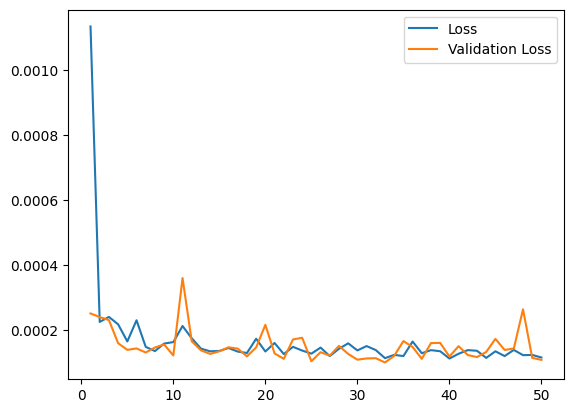

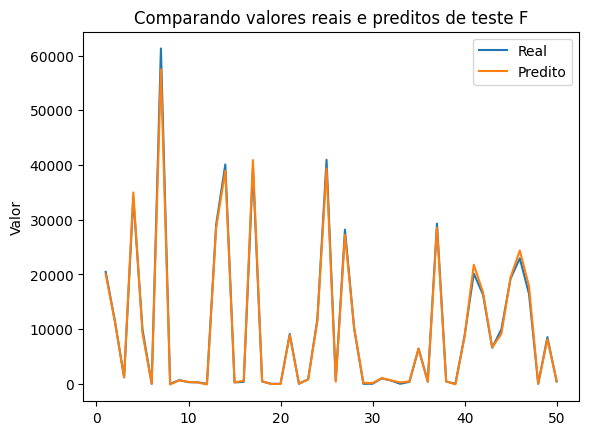

In [189]:
loss_history_F = history_F.history['loss']
val_loss_history_F = history_F.history['val_loss'] 

x_F = [y_F+1 for y_F in range(0,len(loss_history_F))]

plt.plot(x_F, loss_history_F, label = "Loss")
plt.plot(x_F, val_loss_history_F, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_F = [x_F for x_F in range(1,len(y_test_desnormalizado_F[:50])+1)]
plt.plot(grafico_x_F, y_test_desnormalizado_F[:50], label='Real')
plt.plot(grafico_x_F, predict_desnormalizado_F[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste F')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [190]:
metrics(X_test_F, predict_desnormalizado_F, y_test_desnormalizado_F)

Root Mean Square Error:  95.04
Mean Square Error: 495240.96
Mean Absolut Error: 352.57
Median Absolut Error: 103.32
Explain Variance Score: 99.81
R2 score: 99.81
Adjusted R2 = 99.8


In [191]:
df_predito_F = pd.DataFrame()
df_predito_F['Data'] = X_test_data_F
df_predito_F['Real'] = list(y_test_desnormalizado_F.flatten())
df_predito_F['Predito'] = list(predict_desnormalizado_F.flatten())
df_predito_F.sort_values(by = 'Real', inplace = True)

In [192]:
df_predito_F

,Data,Real,Predito
1238,2012-05-25,0.056000,-230.859833
4322,2020-11-03,0.060000,235.950897
1086,2011-12-25,0.060012,18.322763
3643,2018-12-25,0.060593,-34.135136
1307,2012-08-02,0.060850,20.048698
...,...,...,...
5293,2023-07-02,61742.916532,62058.519531
4347,2020-11-28,61977.057551,61672.054688
5213,2023-04-13,62230.805569,60721.382812
1259,2012-06-15,62869.495587,62069.015625


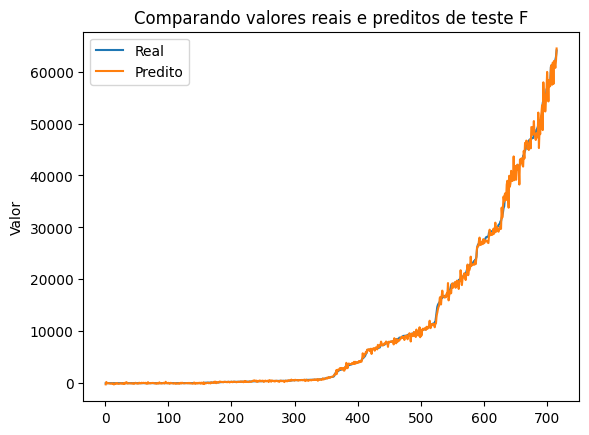

In [193]:
grafico_x_F = [x_F for x_F in range(1,len(df_predito_F)+1)]
plt.plot(grafico_x_F, df_predito_F.Real, label='Real')
plt.plot(grafico_x_F, df_predito_F.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste F')
plt.legend()
plt.ylabel('Valor')
plt.show()

* G ) Qual foi o modelo que obteve os melhores resultados?

In [194]:
metrics(X_test_A, predict_desnormalizado_A, y_test_desnormalizado_A)

Root Mean Square Error:  116.29
Mean Square Error: 552264.33
Mean Absolut Error: 428.25
Median Absolut Error: 218.13
Explain Variance Score: 99.79
R2 score: 99.79
Adjusted R2 = 99.7


In [195]:
metrics(X_test_B, predict_desnormalizado_B, y_test_desnormalizado_B)

Root Mean Square Error:  65.83
Mean Square Error: 677254.98
Mean Absolut Error: 506.75
Median Absolut Error: 321.08
Explain Variance Score: 99.74
R2 score: 99.74
Adjusted R2 = 99.7


In [196]:
metrics(X_test_C, predict_desnormalizado_C, y_test_desnormalizado_C)

Root Mean Square Error:  15.72
Mean Square Error: 600913.56
Mean Absolut Error: 443.2
Median Absolut Error: 230.64
Explain Variance Score: 99.77
R2 score: 99.77
Adjusted R2 = 99.7


In [197]:
metrics(X_test_D, predict_desnormalizado_D, y_test_desnormalizado_D)

Root Mean Square Error:  68.1
Mean Square Error: 520113.95
Mean Absolut Error: 410.81
Median Absolut Error: 206.48
Explain Variance Score: 99.8
R2 score: 99.8
Adjusted R2 = 99.8


In [198]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  617.05
Mean Square Error: 1100330.31
Mean Absolut Error: 689.72
Median Absolut Error: 352.42
Explain Variance Score: 99.72
R2 score: 99.57
Adjusted R2 = 99.5


In [199]:
metrics(X_test_F, predict_desnormalizado_F, y_test_desnormalizado_F)

Root Mean Square Error:  95.04
Mean Square Error: 495240.96
Mean Absolut Error: 352.57
Median Absolut Error: 103.32
Explain Variance Score: 99.81
R2 score: 99.81
Adjusted R2 = 99.8


2 - Agora que já decidiu qual o melhor filtro, treine 4 estruturas de modelos distintas, exiba as métricas para cada modelo e informe qual o melhor. As estruturas do modelo são:

* A ) Com uma camada oculta

In [200]:
model_E = Sequential()
model_E.add(Dense(64, input_dim = input_dim_E, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(1, activation = 'linear'))
model_E.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_E = model_E.fit(X_train_E, y_train_E, epochs = 50, validation_data = (X_val_E, y_val_E), verbose = 0)

In [201]:
predict_E = model_E.predict(X_test_E)
y_test_desnormalizado_E = scale_y_E.inverse_transform(y_test_E)

predict_desnormalizado_E = scale_y_E.inverse_transform(predict_E)

23/23 [==============================] - 0s 4ms/step


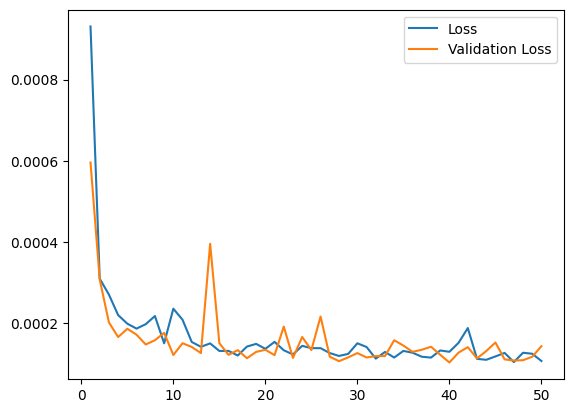

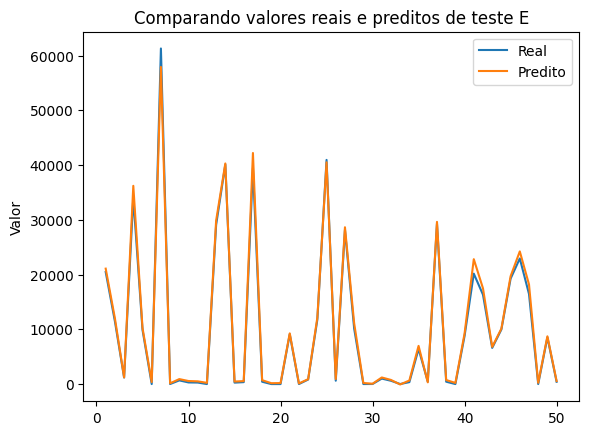

In [202]:
loss_history_E = history_E.history['loss']
val_loss_history_E = history_E.history['val_loss'] 

x_E = [y_E+1 for y_E in range(0,len(loss_history_E))]

plt.plot(x_E, loss_history_E, label = "Loss")
plt.plot(x_E, val_loss_history_E, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_E = [x_E for x_E in range(1,len(y_test_desnormalizado_E[:50])+1)]
plt.plot(grafico_x_E, y_test_desnormalizado_E[:50], label='Real')
plt.plot(grafico_x_E, predict_desnormalizado_E[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [203]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  345.58
Mean Square Error: 640181.41
Mean Absolut Error: 472.88
Median Absolut Error: 228.4
Explain Variance Score: 99.8
R2 score: 99.75
Adjusted R2 = 99.7


* B ) Com duas camadas ocultas

In [204]:
model_E = Sequential()
model_E.add(Dense(64, input_dim = input_dim_E, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(1, activation = 'linear'))
model_E.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_E = model_E.fit(X_train_E, y_train_E, epochs = 50, validation_data = (X_val_E, y_val_E), verbose = 0)

In [205]:
predict_E = model_E.predict(X_test_E)
y_test_desnormalizado_E = scale_y_E.inverse_transform(y_test_E)

predict_desnormalizado_E = scale_y_E.inverse_transform(predict_E)

23/23 [==============================] - 0s 2ms/step


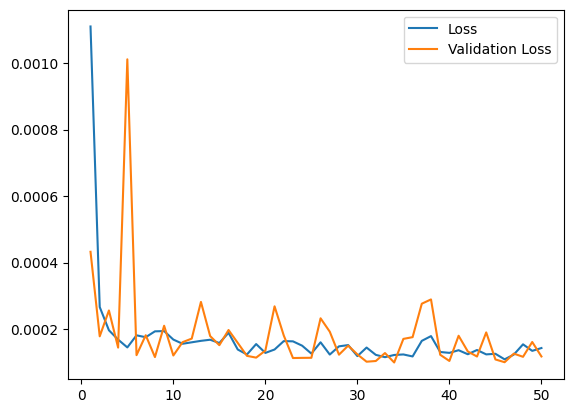

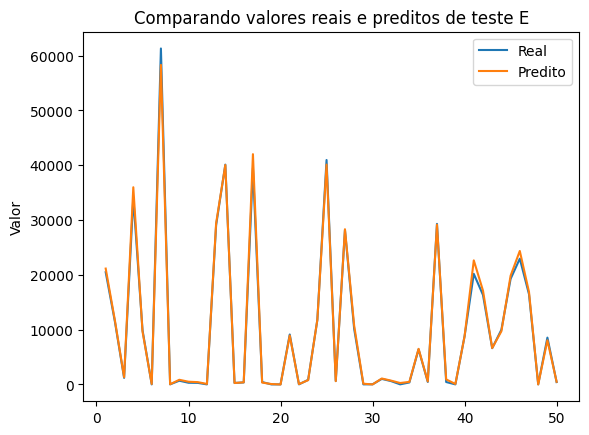

In [206]:
loss_history_E = history_E.history['loss']
val_loss_history_E = history_E.history['val_loss'] 

x_E = [y_E+1 for y_E in range(0,len(loss_history_E))]

plt.plot(x_E, loss_history_E, label = "Loss")
plt.plot(x_E, val_loss_history_E, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_E = [x_E for x_E in range(1,len(y_test_desnormalizado_E[:50])+1)]
plt.plot(grafico_x_E, y_test_desnormalizado_E[:50], label='Real')
plt.plot(grafico_x_E, predict_desnormalizado_E[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [207]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  152.02
Mean Square Error: 534784.99
Mean Absolut Error: 364.03
Median Absolut Error: 103.15
Explain Variance Score: 99.8
R2 score: 99.79
Adjusted R2 = 99.8


* C ) Com 5 camadas ocultas

In [208]:
model_E = Sequential()
model_E.add(Dense(64, input_dim = input_dim_E, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(1, activation = 'linear'))
model_E.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_E = model_E.fit(X_train_E, y_train_E, epochs = 50, validation_data = (X_val_E, y_val_E), verbose = 0)

In [209]:
predict_E = model_E.predict(X_test_E)
y_test_desnormalizado_E = scale_y_E.inverse_transform(y_test_E)

predict_desnormalizado_E = scale_y_E.inverse_transform(predict_E)

23/23 [==============================] - 0s 2ms/step


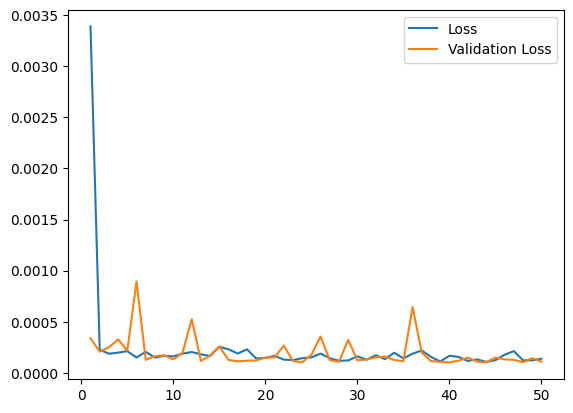

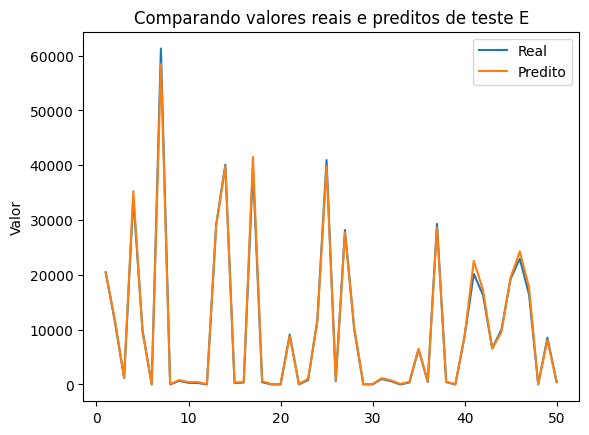

In [210]:
loss_history_E = history_E.history['loss']
val_loss_history_E = history_E.history['val_loss'] 

x_E = [y_E+1 for y_E in range(0,len(loss_history_E))]

plt.plot(x_E, loss_history_E, label = "Loss")
plt.plot(x_E, val_loss_history_E, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_E = [x_E for x_E in range(1,len(y_test_desnormalizado_E[:50])+1)]
plt.plot(grafico_x_E, y_test_desnormalizado_E[:50], label='Real')
plt.plot(grafico_x_E, predict_desnormalizado_E[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [211]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  69.98
Mean Square Error: 485784.8
Mean Absolut Error: 355.15
Median Absolut Error: 123.84
Explain Variance Score: 99.81
R2 score: 99.81
Adjusted R2 = 99.8


* D ) Com 10 camadas ocultas

In [212]:
model_E = Sequential()
model_E.add(Dense(64, input_dim = input_dim_E, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(32, activation = 'relu'))
model_E.add(Dense(1, activation = 'linear'))
model_E.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_E = model_E.fit(X_train_E, y_train_E, epochs = 50, validation_data = (X_val_E, y_val_E), verbose = 0)

In [213]:
predict_E = model_E.predict(X_test_E)
y_test_desnormalizado_E = scale_y_E.inverse_transform(y_test_E)

predict_desnormalizado_E = scale_y_E.inverse_transform(predict_E)

23/23 [==============================] - 0s 2ms/step


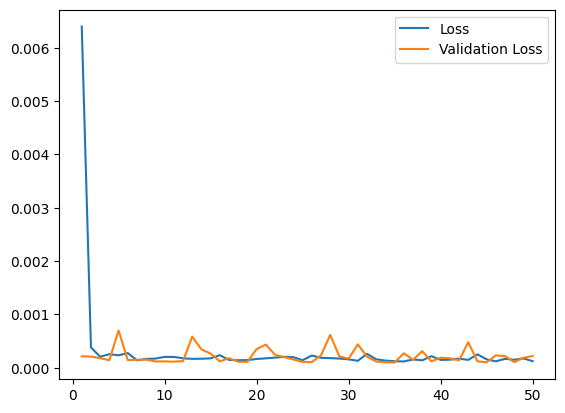

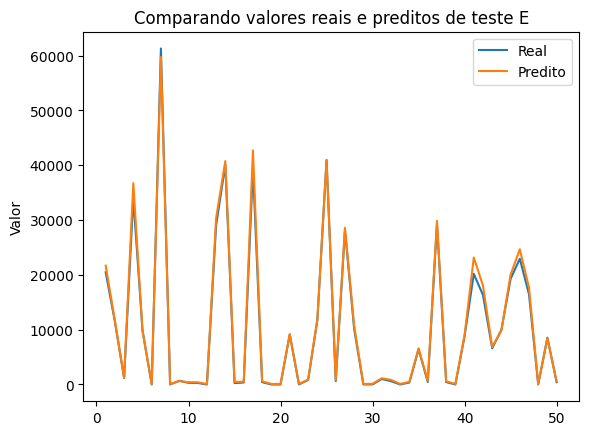

In [214]:
loss_history_E = history_E.history['loss']
val_loss_history_E = history_E.history['val_loss'] 

x_E = [y_E+1 for y_E in range(0,len(loss_history_E))]

plt.plot(x_E, loss_history_E, label = "Loss")
plt.plot(x_E, val_loss_history_E, label = "Validation Loss")
plt.legend()
plt.show()


grafico_x_E = [x_E for x_E in range(1,len(y_test_desnormalizado_E[:50])+1)]
plt.plot(grafico_x_E, y_test_desnormalizado_E[:50], label='Real')
plt.plot(grafico_x_E, predict_desnormalizado_E[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste E')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [215]:
metrics(X_test_E, predict_desnormalizado_E, y_test_desnormalizado_E)

Root Mean Square Error:  442.75
Mean Square Error: 954931.36
Mean Absolut Error: 516.34
Median Absolut Error: 152.82
Explain Variance Score: 99.7
R2 score: 99.63
Adjusted R2 = 99.6
